<a href="https://colab.research.google.com/github/A790227/data-project-llm/blob/main/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluating & Optimizing Project Model

### Push your model to Hugging Face's Model Hub,

- Authenticate Notebook
Use the following code to authenticate notebook to Hugging Face. 

In [43]:
from huggingface_hub import notebook_login

notebook_login()

- Training Arguments to Push the Model to Hugging Face Hub

In [50]:
from transformers import TrainingArguments

repo_name = "LLM Model IMDB"

training_args = TrainingArguments(
    output_dir=repo_name,           # Output directory for checkpoints
    evaluation_strategy="epoch",    # Evaluation strategy (epoch, steps, etc.)
    learning_rate=2e-5,             # Learning rate
    per_device_train_batch_size=16, # Batch size for training
    per_device_eval_batch_size=16,  # Batch size for evaluation
    num_train_epochs=1,             # Number of epochs
    weight_decay=0.01,              # Weight decay
    push_to_hub=True                # Push to Hugging Face Hub
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


- Train the Model and Push to the Hub

In [46]:
from transformers import Trainer

# Initialize the Trainer with the training arguments
trainer = Trainer(
    model=model,                        # Model
    args=training_args,                 # Training arguments
    train_dataset=train_ds,             # Training dataset
    eval_dataset=eval_ds,               # Evaluation dataset
    tokenizer=tokenizer,                # Tokenizer
    compute_metrics=compute_metrics     # Metrics function
)

# Train the model
trainer.train()

# Evaluate the model
trainer.evaluate()

# Push the model to the Hugging Face Hub
trainer.push_to_hub()

Epoch,Training Loss,Validation Loss,Accuracy
1,0.185100,0.235214,0.926760


Upload 2 LFS files:   0%|          | 0/2 [00:00<?, ?it/s]

events.out.tfevents.1729456062.2d1475dc4890.2565.1:   0%|          | 0.00/411 [00:00<?, ?B/s]

events.out.tfevents.1729455563.2d1475dc4890.2565.0:   0%|          | 0.00/6.18k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/A790227/your-repo-name/commit/b959d412c8f351e560d76316564ae7eea10dfda0', commit_message='End of training', commit_description='', oid='b959d412c8f351e560d76316564ae7eea10dfda0', pr_url=None, pr_revision=None, pr_num=None)

- Use the Model for Inference, 
Once model is on Hugging Face, Can use it for inference on new text data using the pipeline API.

In [48]:
from transformers import pipeline

# Load the model from the Hugging Face Hub
my_model = pipeline("sentiment-analysis", model="a790227/LLM Model IMDB")

# Define new text data for predictions
data = ["I love this movie!", "This was a terrible experience."]

# Make predictions on the new text
predictions = my_model(data)

# Print the predictions
for text, pred in zip(data, predictions):
    print(f"Text: {text}\nPrediction: {pred['label']}, Confidence: {pred['score']:.2f}\n")

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


- Evaluate the Model on Unseen Data, 
    - Unseen data, can evaluate the model's performance by comparing these predictions against ground truth labels, using accuracy, precision, recall, or F1 score.

In [49]:
from sklearn.metrics import accuracy_score, f1_score

# True labels for the data
true_labels = [1, 0]  # Replace with actual labels

# Convert predicted labels from 'POSITIVE'/'NEGATIVE' to 1/0
predicted_labels = [1 if pred['label'] == 'POSITIVE' else 0 for pred in predictions]

# Calculate accuracy and F1 score
accuracy = accuracy_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"F1 Score: {f1:.2f}")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for training and validation performance
epochs = [1]
train_loss = [0.1851]
val_loss = [0.2352]
accuracy = [0.9268]

# Plot 1: Loss Curve
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(np.arange(1, 2, step=1))
plt.legend()
plt.grid(True)
plt.show()

# Plot 2: Accuracy Curve
plt.figure(figsize=(10, 5))
plt.plot(epochs, accuracy, label='Validation Accuracy', marker='o', color='green')
plt.title('Validation Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, 2, step=1))
plt.ylim(0.9, 1.0)
plt.legend()
plt.grid(True)
plt.show()

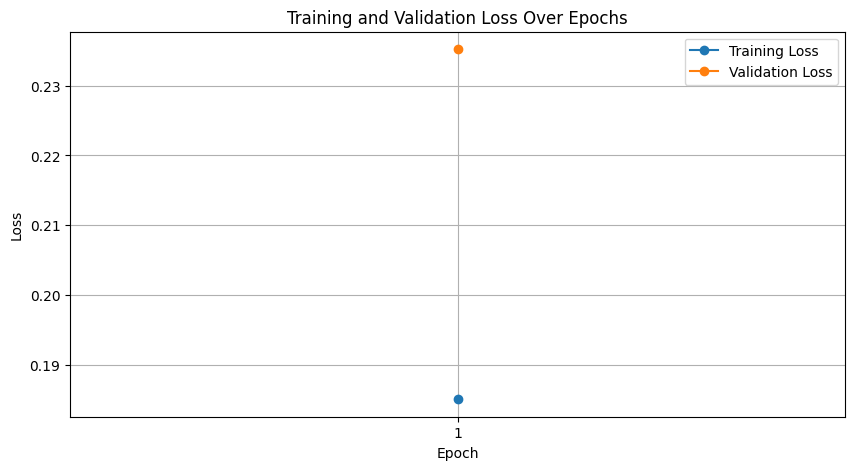

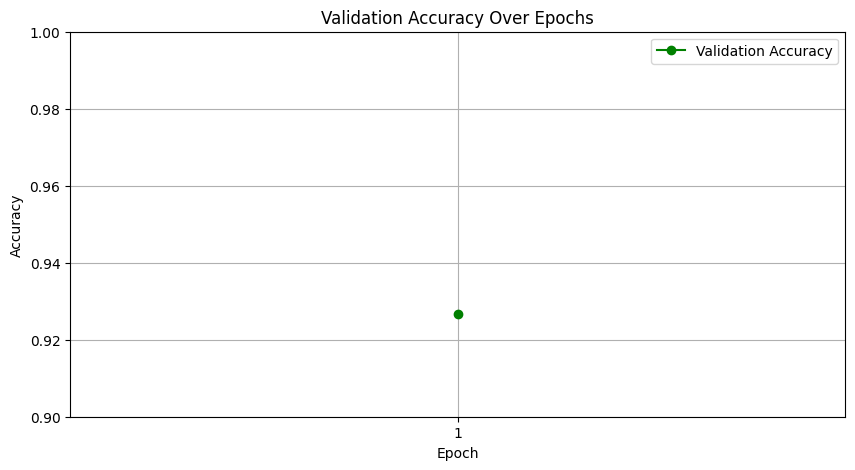

- The model was trained for just 1 epoch, and it achieved an accuracy of 92.68% on the validation set, which is good result for a single pass through the dataset.
- The training loss (0.1851) is slightly lower than the validation loss (0.2352), which is expected because the model is usually more accurate on the data it was trained on. The small gap indicates that the model is not significantly overfitting.
- Overall, the model is performing well with high accuracy and reasonable loss values, suggesting it's making good predictions on both the training and validation sets after just 1 epoch.